Assignment_HW_02_EDA_IdrisMahamat

Idris Mahamat EDA assignment reviewed

In [1]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as se
from ydata_profiling import ProfileReport # type: ignore

In [2]:
# 1- now let's load the dataset  breast-cancer-wisconsin_pfizer05.csv, check the type of variable and normalise the type
ctype = {'Sample':'str', 'F1':'Int64','F2':'Int64','F3':'Int64','F4':'Int64','F5':'Int64','F6':'Int64','F7':'Int64','F8':'Int64','F9':'Int64','Class':'Int64'}

chemin_fichier = '/home/elcaskerito/Documents/Stevens/ml_eda_AI_stevens_institute_tech/breast-cancer-wisconsin_pfizer05.csv'
df = pd.read_csv(chemin_fichier, na_values='?',dtype=ctype)


dd = pd.read_csv(chemin_fichier)
print('\n Display of our data type before \n')
print(dd.dtypes)
print('\n ---------------------------------------------------------')
print(dd.head())

print('\n ---------------------------------------------------------')

print('\n Display of our data type after changing the data type \n')
print(df.dtypes)

print('\n ---------------------------------------------------------')

print(df.head())

print('\n ---------------------------------------------------------')








 Display of our data type before 

Sample      int64
F1          int64
F2          int64
F3          int64
F4          int64
F5          int64
F6        float64
F7          int64
F8          int64
F9          int64
Class       int64
dtype: object

 ---------------------------------------------------------
    Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
0  1198641  10  10   6   3   3  10.0   4   3   2      4
1  1080233   7   6   6   3   2  10.0   7   1   1      4
2   606140   1   1   1   1   2   NaN   2   1   1      2
3   740492   1   1   1   1   2   1.0   3   1   1      2
4  1120559   8   3   8   3   4   9.0   8   9   8      4

 ---------------------------------------------------------

 Display of our data type after changing the data type 

Sample    object
F1         Int64
F2         Int64
F3         Int64
F4         Int64
F5         Int64
F6         Int64
F7         Int64
F8         Int64
F9         Int64
Class      Int64
dtype: object

 -----------------------------------

In [3]:
# I. Summarize each column by min,max,mean

# detail = df.describe(include='all')

detail_mmm = df.describe().loc[['min','max','mean']]

print(detail_mmm)
print('\n ---------------------------------------------------------')


# print(detail)

            F1    F2        F3        F4        F5        F6        F7  \
min        1.0   1.0       1.0       1.0       1.0       1.0       1.0   
max       10.0  10.0      10.0      10.0      10.0      10.0      10.0   
mean  5.485714   4.0  4.142857  2.942857  3.771429  4.382353  3.942857   

            F8        F9     Class  
min        1.0       1.0       2.0  
max       10.0      10.0       4.0  
mean  3.685714  2.714286  2.857143  

 ---------------------------------------------------------


In [4]:
# II. Identifying and display the missing values
display = df[df.isna().any(axis=1)]

print(display) 

# missing value table 
print('\n ---------------------------------------------------------')

ms_val = df.isnull().sum()
print(ms_val)


   Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
2  606140   1   1   1   1   2  <NA>   2   1   1      2

 ---------------------------------------------------------
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        1
F7        0
F8        0
F9        0
Class     0
dtype: int64


In [5]:
# Replacing the missing values with the “mean” of the column.

df['F6'].fillna(df['F6'].mean().round(),inplace=True)

# let check the missing value again

display = df[df.isna().any(axis=1)]

print(display) 

# missing value table 
print('\n ---------------------------------------------------------')

print(df.isnull().sum())

Empty DataFrame
Columns: [Sample, F1, F2, F3, F4, F5, F6, F7, F8, F9, Class]
Index: []

 ---------------------------------------------------------
Sample    0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
Class     0
dtype: int64


/tmp/ipykernel_196190/2502142717.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F6'].fillna(df['F6'].mean().round(),inplace=True)


In [6]:
# Displaying the frequency table of “Class” vs. F6 using groupby

# freq_table = df.groupby("Class")["F6"].value_counts().unstack()

# print("Frequency Table:\n -------------- \n", freq_table,)

# print("-------------------------------------------------")

# Displaying the frequency table of “Class” vs. F6 using crosstab 
ts = pd.crosstab(df["F6"], df["Class"])
print(ts)

# print(df.info())



Class   2  4
F6          
1      17  0
2       1  0
3       0  1
4       1  0
5       1  2
8       0  3
9       0  2
10      0  7


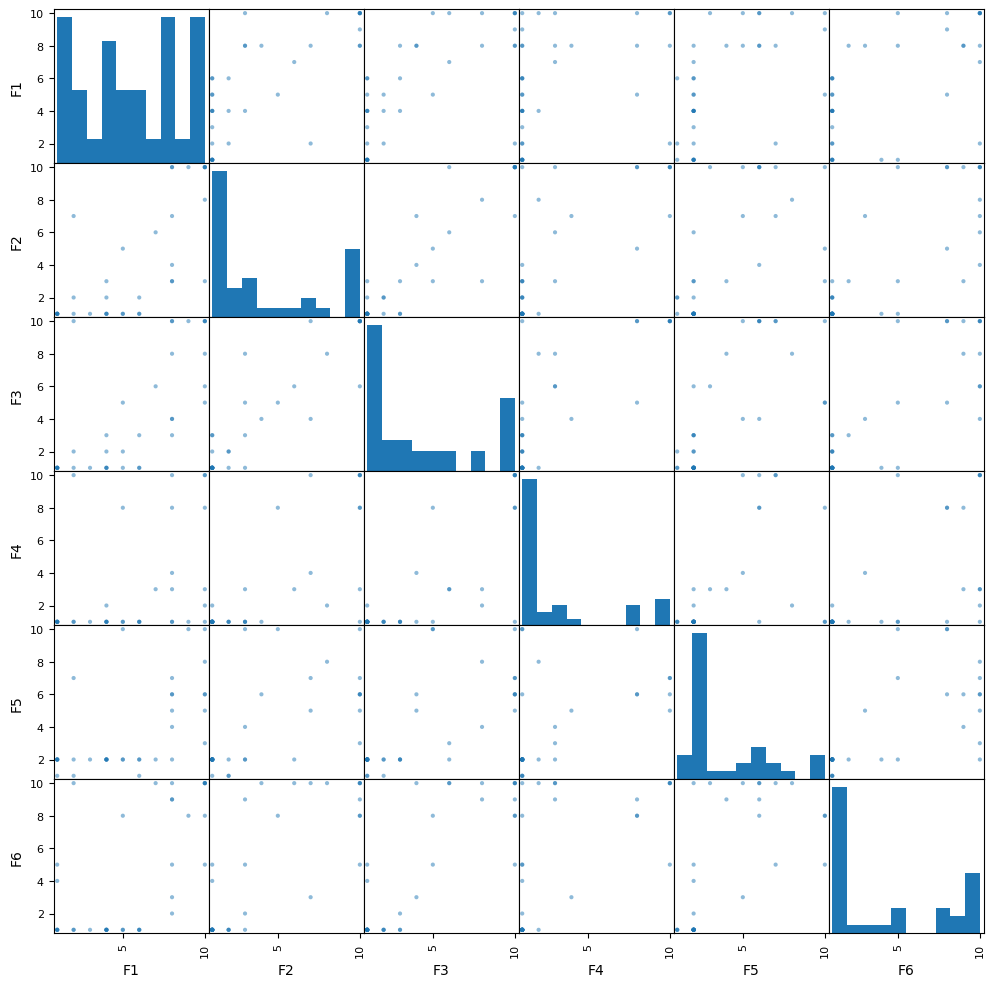


 -------------------- * Display individualy * -------------------------------------


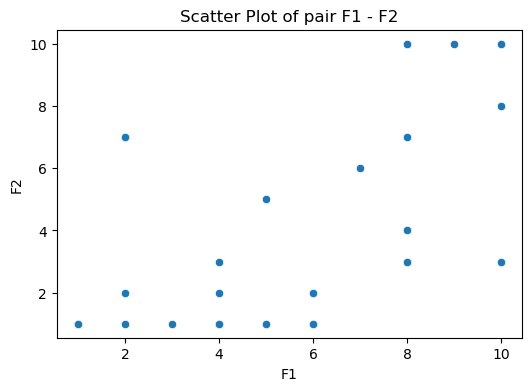

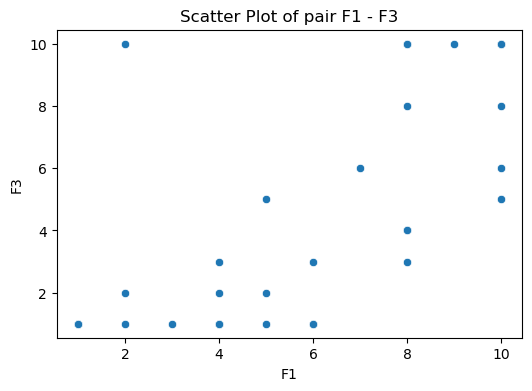

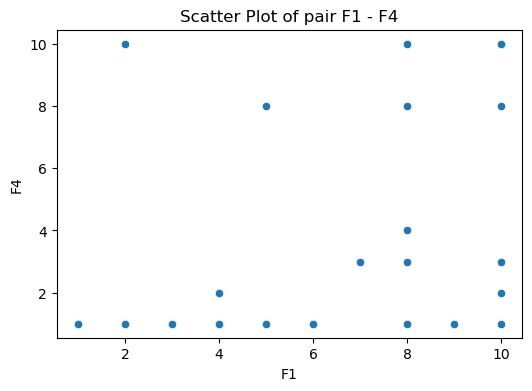

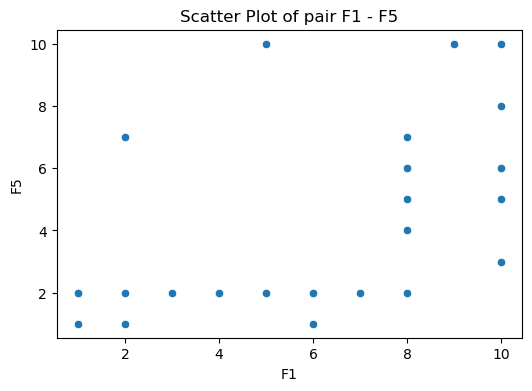

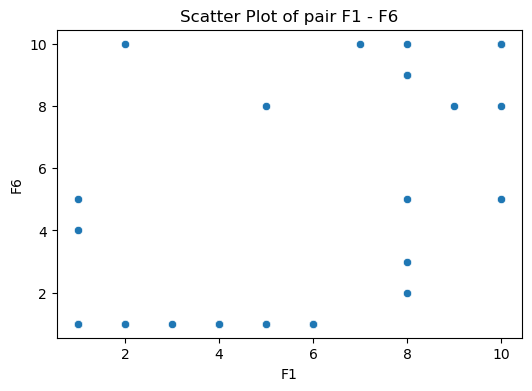

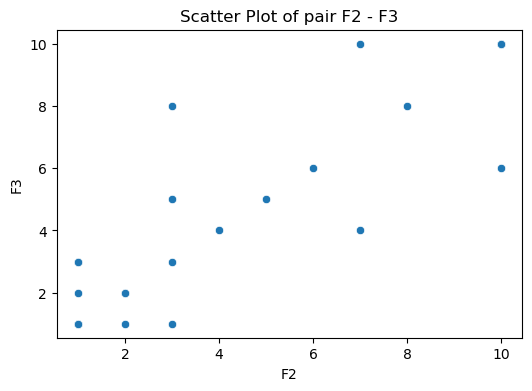

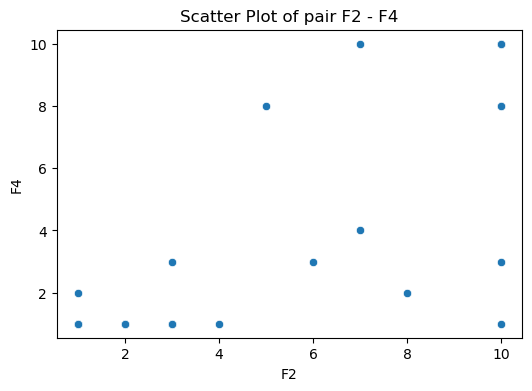

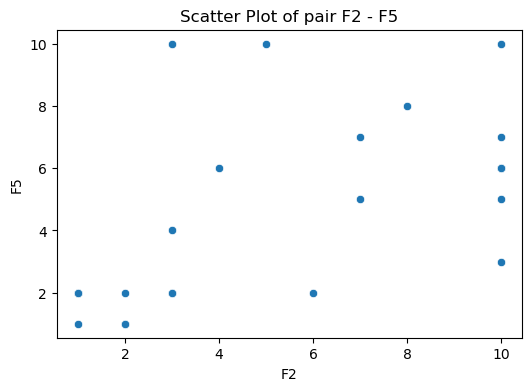

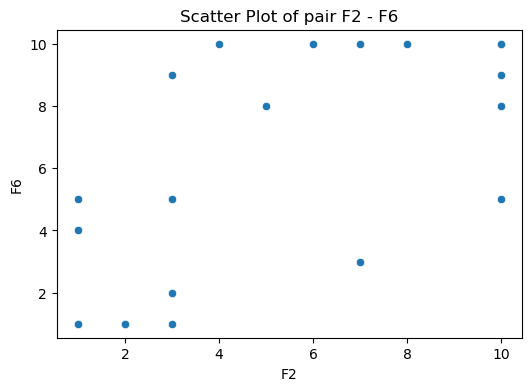

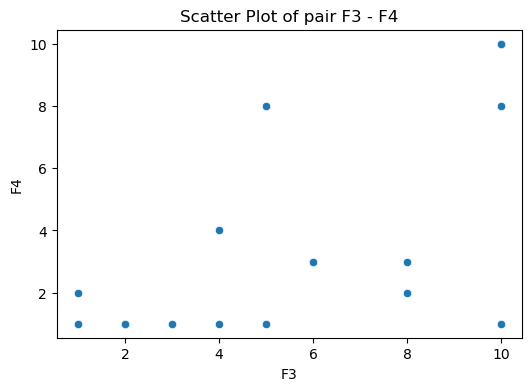

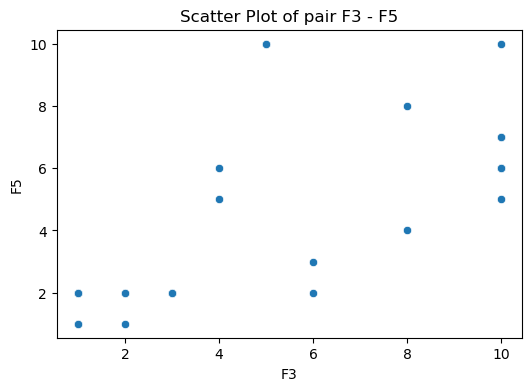

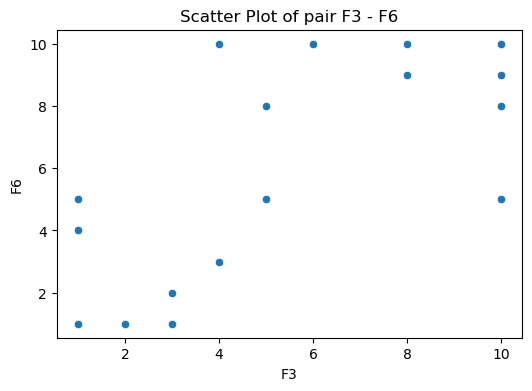

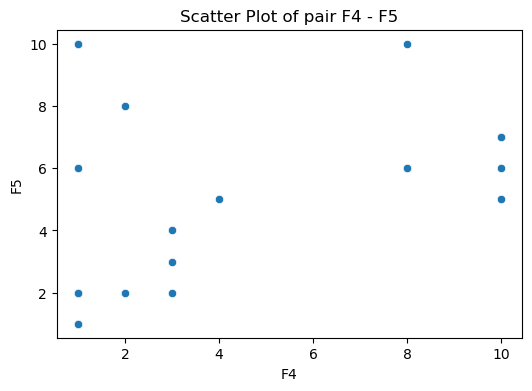

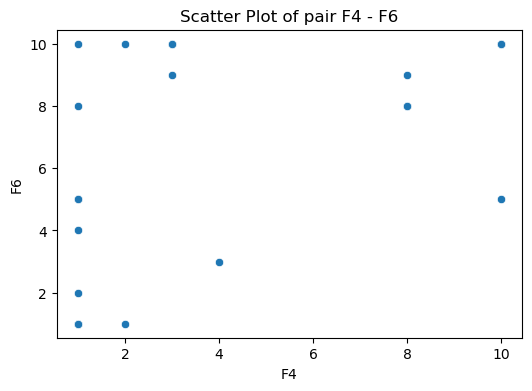

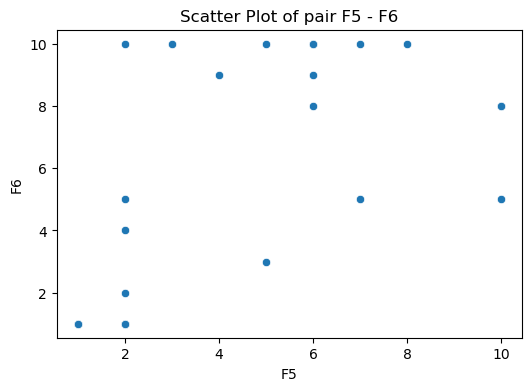

In [7]:
# v. Displaying the scatter plot of F1 to F6, one pair at a time


# Display in one output

pd.plotting.scatter_matrix(df.loc[:, 'F1':'F6'], figsize=(12,12), diagonal='hist')

pt.show()

# Display separetely 


print('\n -------------------- * Display individualy * -------------------------------------')

fn = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']

for i in range(len(fn)):
    for j in range(i+1, len(fn)):
        pt.figure(figsize=(6,4))
        se.scatterplot(x=df[fn[i]], y=df[fn[j]])
        pt.xlabel(fn[i])
        pt.ylabel(fn[j])
        pt.title(f'Scatter Plot of pair {fn[i]} - {fn[j]}')
        pt.show()




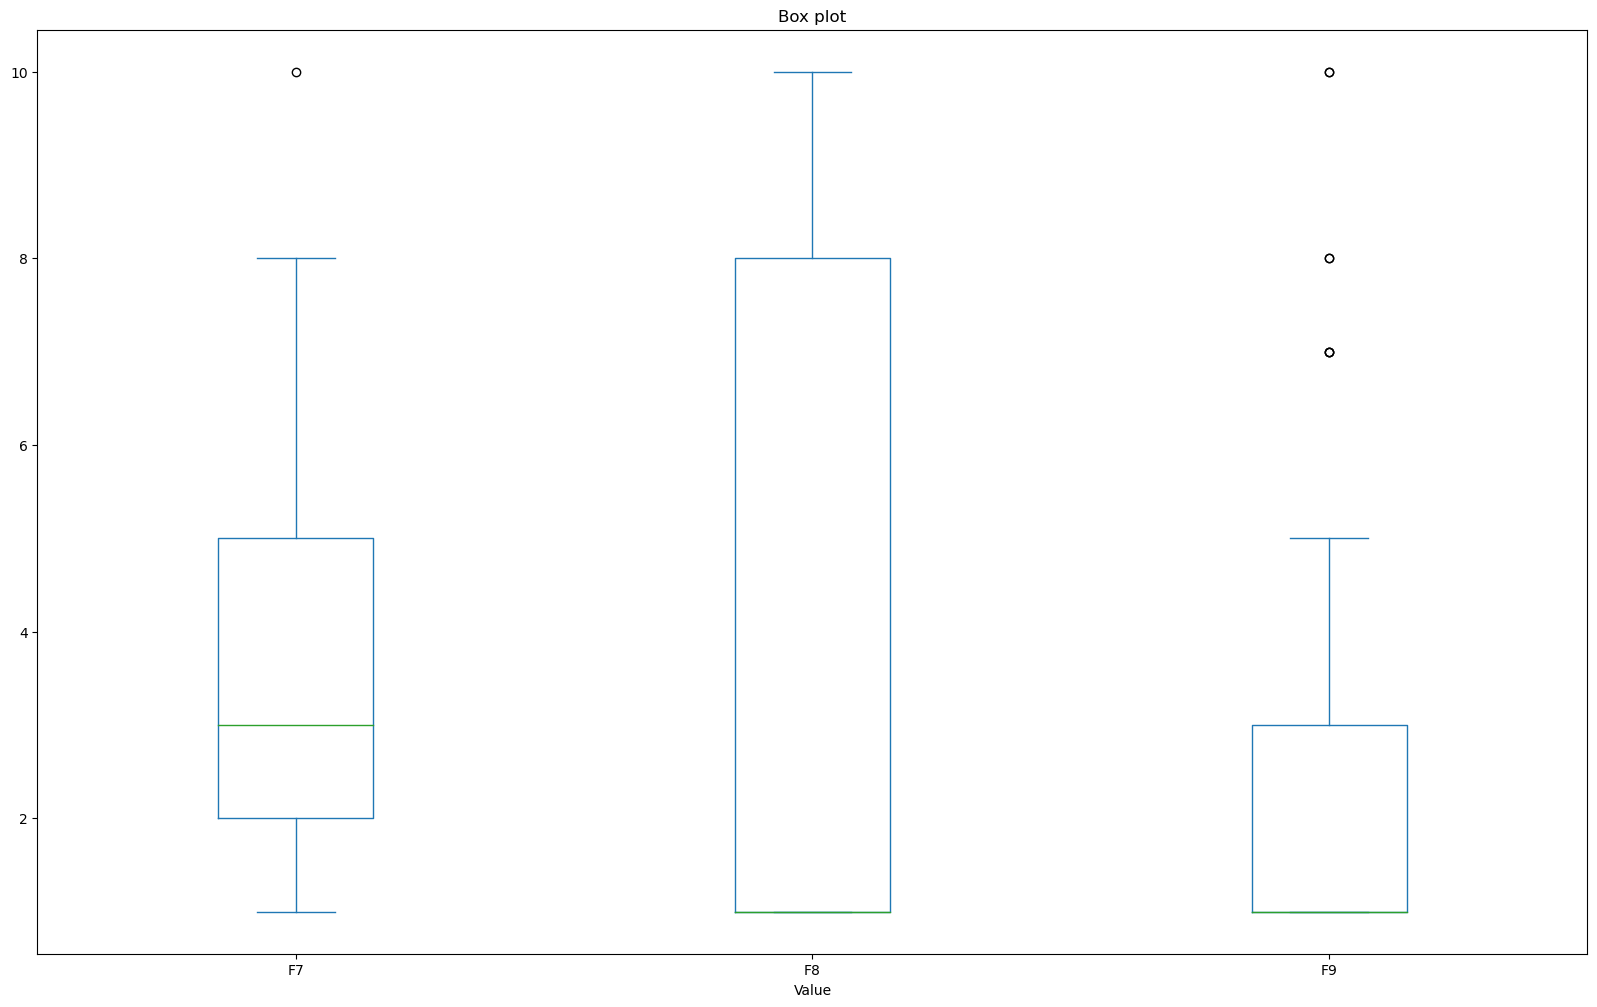

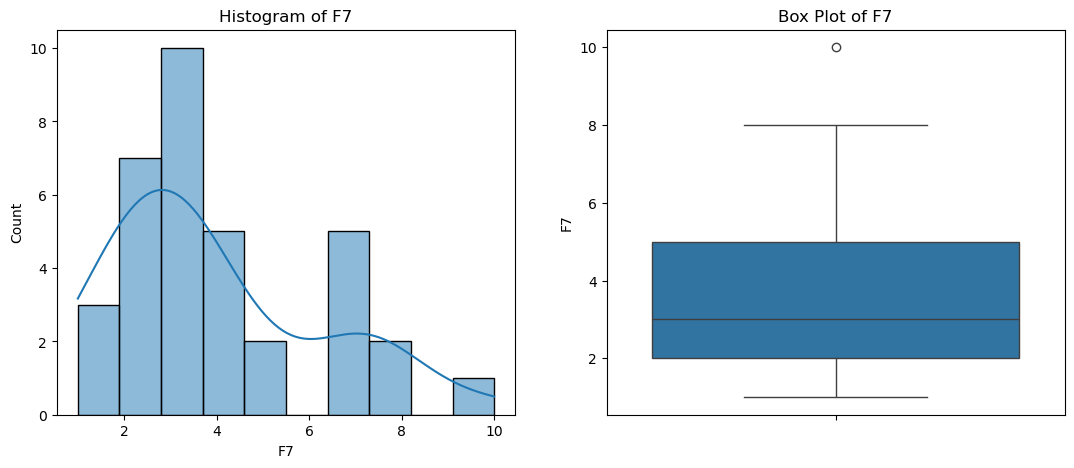

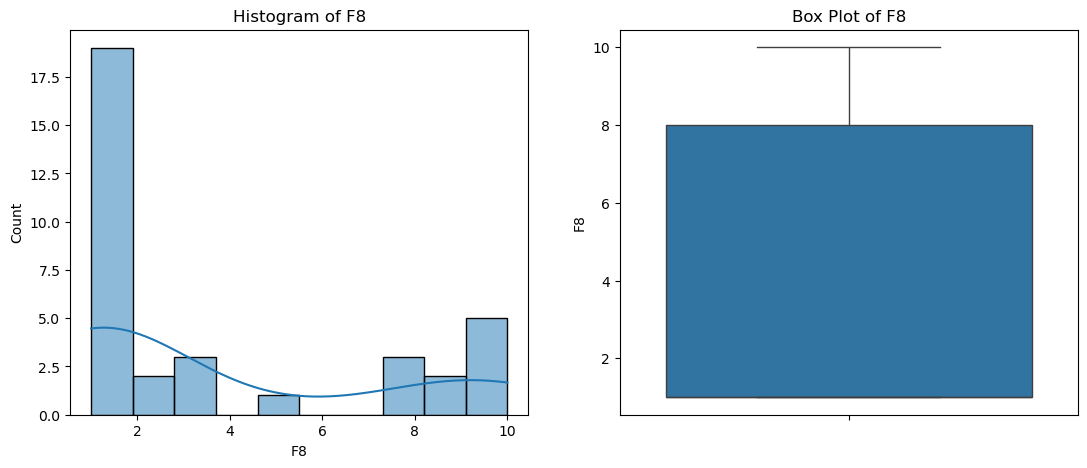

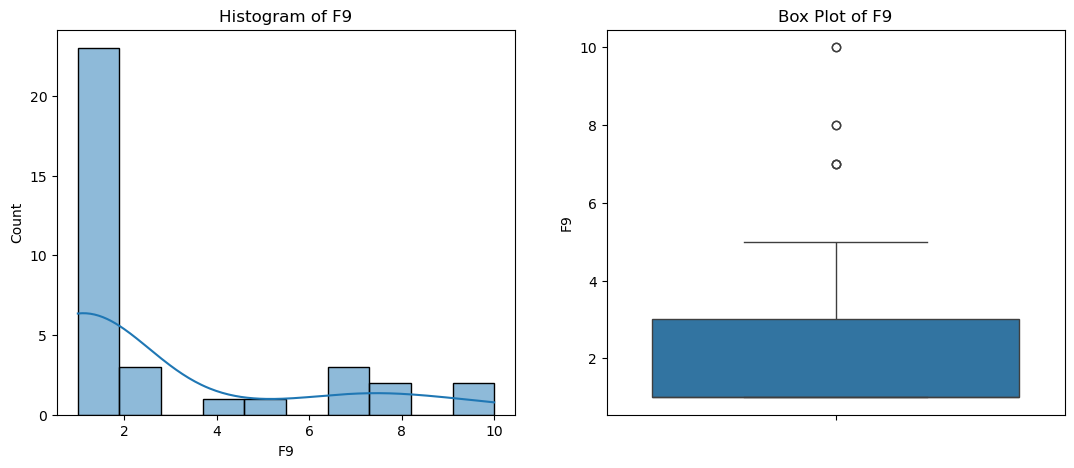

In [8]:
# VI. Show histogram box plot for columns F7 to F9

subset=df.loc[:, 'F7':'F9']
subset.plot(kind="box", vert=True, figsize=(20, 12))
pt.title("Box plot", fontsize=12)
pt.xlabel("Value")
pt.show()



fn_f7F9 = ['F7', 'F8', 'F9']

for fn in fn_f7F9:
    pt.figure(figsize=(13, 5))

    # Histogram
    pt.subplot(1, 2, 1)
    se.histplot(df[fn], bins=10, kde=True)
    pt.title(f'Histogram of {fn}')

    # Box plot
    pt.subplot(1, 2, 2)
    se.boxplot(y=df[fn])
    pt.title(f'Box Plot of {fn}')

    pt.show()

# profile = ProfileReport(df, title="Profiling data frame")
# profile

In [9]:
#  2-Delete all the objects from your R/Python- environment. Reload the “breast-cancer-
# wisconsin.data.csv” from canvas into R/Python. Remove any row with a missing value in any of the
# columns. 


del df
# Reload the “breast-cancer-wisconsin_pfizer05.csv” into Python
df = pd.read_csv(chemin_fichier)

# Remove all row with a missing value in any columns
df_cleaned = df.dropna()

# Display the cleaned dataset info
print(df_cleaned.info())
print(df_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 0 to 34
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sample  34 non-null     int64  
 1   F1      34 non-null     int64  
 2   F2      34 non-null     int64  
 3   F3      34 non-null     int64  
 4   F4      34 non-null     int64  
 5   F5      34 non-null     int64  
 6   F6      34 non-null     float64
 7   F7      34 non-null     int64  
 8   F8      34 non-null     int64  
 9   F9      34 non-null     int64  
 10  Class   34 non-null     int64  
dtypes: float64(1), int64(10)
memory usage: 3.2 KB
None
    Sample  F1  F2  F3  F4  F5    F6  F7  F8  F9  Class
0  1198641  10  10   6   3   3  10.0   4   3   2      4
1  1080233   7   6   6   3   2  10.0   7   1   1      4
3   740492   1   1   1   1   2   1.0   3   1   1      2
4  1120559   8   3   8   3   4   9.0   8   9   8      4
5  1369821  10  10  10  10   5  10.0  10  10   7      4
